#**Introducción**

* Las exportaciones constituyen uno de los principales ingresos económicos para
Chile, impulsando el desarrollo y crecimiento económico del país. Chile es uno de
los principales exportadores mundiales en productos de minería, como cobre, litio,
yodo, así como en productos frutícolas, como uvas, arándanos, ciruelas,
manzanas y cerezas.

* Es importante realizar un estudio sobre las tendencias en la demanda de
productos que Chile exporta y conocer si existe algún tipo de estacionalidad en los datos.

* **Objetivo del trabajo:** Conocer las tendencias de los productos mineros en Chile desde el año 2017 a 2024

* Los datos que se utilizarán en este trabajo fueron obtenidos de la base de datos de exportaciones chilena: https://www.aduana.cl/base-de-datos-dinamicas-de-exportaciones/aduana/2020-11-19/151830.html

#**Librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Carga de la información**

In [2]:
exportaciones_2017 = pd.read_excel('ExportacionesAño2017.xlsx')
exportaciones_2018 = pd.read_excel('ExportacionesRegionOrigenAño2018.xlsx')
exportaciones_2019 = pd.read_excel('ExportacionesAño2019.xlsx')
exportaciones_2020 = pd.read_excel('ExportacionesAño2020.xlsx')
exportaciones_2021 = pd.read_excel('ExportacionesAño2021.xlsx')
exportaciones_2022 = pd.read_excel('ExportacionesAño2022.xlsx')
exportaciones_2023 = pd.read_excel('ExportacionesAño2023.xlsx')

##**Exploración de la data**

In [3]:
exportaciones_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239716 entries, 0 to 239715
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AÑO             239716 non-null  int64  
 1   MES             239716 non-null  object 
 2   REGIONSALIDA    239716 non-null  object 
 3   PAISDESTINO     239716 non-null  object 
 4   VIATRANSPORTE   239716 non-null  object 
 5   PUERTOEMBARQUE  239716 non-null  object 
 6   ADUANA          239716 non-null  object 
 7   SECTOR          239713 non-null  object 
 8   PRODUCTO        239713 non-null  object 
 9   CODARANCELARIO  239713 non-null  float64
 10  MONTOFOB        239713 non-null  float64
 11  PESOTONELADAS   239708 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 21.9+ MB


In [4]:
exportaciones_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239887 entries, 0 to 239886
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AÑO             239887 non-null  int64  
 1   MES             239887 non-null  object 
 2   PAISDESTINO     239887 non-null  object 
 3   REGIONORIGEN    239887 non-null  object 
 4   PUNTODECONTROL  239887 non-null  object 
 5   ADUANA          239887 non-null  object 
 6   CODARANCELARIO  239887 non-null  int64  
 7   SECTOR          239887 non-null  object 
 8   PRODUCTOGRAL    239887 non-null  object 
 9   PRODUCTO        239887 non-null  object 
 10  MONTOFOB(US$)   239887 non-null  float64
 11  PESOTONELADAS   239768 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 22.0+ MB


##**Estandarización de nombres de columnas**

In [5]:
exportaciones_2017 = exportaciones_2017.rename(columns = {'MONTOFOB':'MONTOFOB (US$)'})
exportaciones_2018 = exportaciones_2018.rename(columns = {'MONTOFOB(US$)':'MONTOFOB (US$)'})
exportaciones_2019 = exportaciones_2019.rename(columns = {'MONTOFOB':'MONTOFOB (US$)'})
exportaciones_2020 = exportaciones_2020.rename(columns = {'MONTOFOB':'MONTOFOB (US$)'})
exportaciones_2021 = exportaciones_2021.rename(columns = {'MONTOFOB':'MONTOFOB (US$)'})
exportaciones_2022 = exportaciones_2022.rename(columns = {'MONTOFOB(US$)':'MONTOFOB (US$)'})


##**Creación de una copia de la información**

In [6]:
df_2017 = exportaciones_2017.copy()
df_2018 = exportaciones_2018.copy()
df_2019 = exportaciones_2019.copy()
df_2020 = exportaciones_2020.copy()
df_2021 = exportaciones_2021.copy()
df_2022 = exportaciones_2022.copy()
df_2023 = exportaciones_2023.copy()

##**Selección de columnas de interés**

In [7]:
df_2017 = df_2017[['AÑO','MES','PAISDESTINO','SECTOR','PRODUCTO','MONTOFOB (US$)','PESOTONELADAS']]
df_2018 = df_2018[['AÑO','MES','PAISDESTINO','SECTOR','PRODUCTO','MONTOFOB (US$)','PESOTONELADAS']]
df_2019 = df_2019[['AÑO','MES','PAISDESTINO','SECTOR','PRODUCTO','MONTOFOB (US$)','PESOTONELADAS']]
df_2020 = df_2020[['AÑO','MES','PAISDESTINO','SECTOR','PRODUCTO','MONTOFOB (US$)','PESOTONELADAS']]
df_2021 = df_2021[['AÑO','MES','PAISDESTINO','SECTOR','PRODUCTO','MONTOFOB (US$)','PESOTONELADAS']]
df_2022 = df_2022[['AÑO','MES','PAISDESTINO','SECTOR','PRODUCTO','MONTOFOB (US$)','PESOTONELADAS']]
df_2023 = df_2023[['AÑO','MES','PAISDESTINO','SECTOR','PRODUCTO','MONTOFOB (US$)','PESOTONELADAS']]

##**Unión de la información**

In [8]:
exportaciones = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])
exportaciones.reset_index(drop = True, inplace = True)
exportaciones.sample(5)

,AÑO,MES,PAISDESTINO,SECTOR,PRODUCTO,MONTOFOB (US$),PESOTONELADAS
592655,2019,Junio,Canadá,No minero,Vinos,858110.64,199.75852
1689338,2023,Noviembre,Argentina,No minero,Resto No minería,71390.19,54.14400
898546,2020,Noviembre,Australia,No minero,Resto No minería,375.00,0.00160
1678684,2023,Noviembre,China,Minero,Cobre,26921171.84,3409.69900
1352520,2022,Septiembre,México,No minero,Madera y sus manufacturas,104176.65,104.18400


In [9]:
print(exportaciones.value_counts('SECTOR'))

SECTOR
No minero                                           1686320
Minero                                                31543
Exportación de servicios calificados por Aduanas       4812
Rancho de naves                                        1391
No Minero                                               425
Name: count, dtype: int64


##**Filtrar por productos de interés**

In [10]:
exportaciones_mineras = exportaciones[exportaciones['SECTOR'] == 'Minero']
print(exportaciones_mineras.value_counts('PRODUCTO'))


PRODUCTO
Cobre                                        9550
Resto Minería                                6544
Litio                                        3773
Minerales de molibdeno y sus concentrados    3192
Minerales de cobre y sus concentrados        2885
Yodo                                         2395
Sal gema, sal de salinas y sal marina         754
Plata                                         568
Oro                                           567
Minerales de hierro y sus concentrados        505
Resto minería                                 497
Minerales de cinc y sus concentrados          181
Minerales de oro y sus concentrados            98
Minerales de plomo y sus concentrados          21
Minerales de plata y sus concentrados          13
Name: count, dtype: int64


##**Transformación de algunos productos**

In [11]:
exportaciones_mineras['PRODUCTO'] = exportaciones_mineras['PRODUCTO'].replace({'Minerales de cobre y sus concentrados':'Cobre','Minerales de hierro y sus concentrados': 'Hierro', 'Minerales de oro y sus concentrados':'Oro', 'Minerales de plata y sus concentrados':'Plata'})



<ipython-input-11-e10872ef1402>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportaciones_mineras['PRODUCTO'] = exportaciones_mineras['PRODUCTO'].replace({'Minerales de cobre y sus concentrados':'Cobre','Minerales de hierro y sus concentrados': 'Hierro', 'Minerales de oro y sus concentrados':'Oro', 'Minerales de plata y sus concentrados':'Plata'})


##**Filtro de productos mineros de interés**

In [12]:
exportaciones_mineras = exportaciones_mineras[
    (exportaciones_mineras['PRODUCTO'] == 'Cobre') |
     (exportaciones_mineras['PRODUCTO'] == 'Litio') |
     (exportaciones_mineras['PRODUCTO'] == 'Oro') |
     (exportaciones_mineras['PRODUCTO'] == 'Plata') |
     (exportaciones_mineras['PRODUCTO'] == 'Hierro')]


##**Cantidad de cargas realizadas por producto minero**

In [13]:
print("Cantidad de cargas por producto minero: \n\n",exportaciones_mineras.value_counts('PRODUCTO'))

Cantidad de cargas por producto minero: 

 PRODUCTO
Cobre     12435
Litio      3773
Oro         665
Plata       581
Hierro      505
Name: count, dtype: int64


##**Limpieza de valores nulos**

In [14]:
exportaciones_mineras.isnull().sum()  #No se encontraron valores nulos

AÑO               0
MES               0
PAISDESTINO       0
SECTOR            0
PRODUCTO          0
MONTOFOB (US$)    0
PESOTONELADAS     0
dtype: int64

###**Ajuste del formato de Pandas para que muestre solo 2 decimales**

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)

##**Resumen estadístico**

In [16]:
exportaciones_mineras[['MONTOFOB (US$)','PESOTONELADAS']].describe()

,MONTOFOB (US$),PESOTONELADAS
count,17959.00,17959.00
mean,17356668.75,11387.24
std,43788967.16,51101.84
min,0.25,0.00
25%,424750.15,40.20
50%,3480924.47,399.08
75%,16423393.08,2868.92
max,892373680.50,1033176.00


##**Resumen por año de exportaciones mineras de (Cobre, Litio, Oro, Plata y Hierro)**

In [17]:
resumen_anual = exportaciones_mineras.groupby('AÑO')[['MONTOFOB (US$)','PESOTONELADAS']].sum()

In [18]:
print(resumen_anual)

      MONTOFOB (US$)  PESOTONELADAS
AÑO                                
2017  35854140029.23    28577304.63
2018  39224525112.82    29024321.16
2019  35230466594.20    24150792.81
2020  38894217524.99    31126654.33
2021  56195164665.82    31952094.95
2022  54420394453.68    29005711.21
2023  51889505620.01    30666581.09


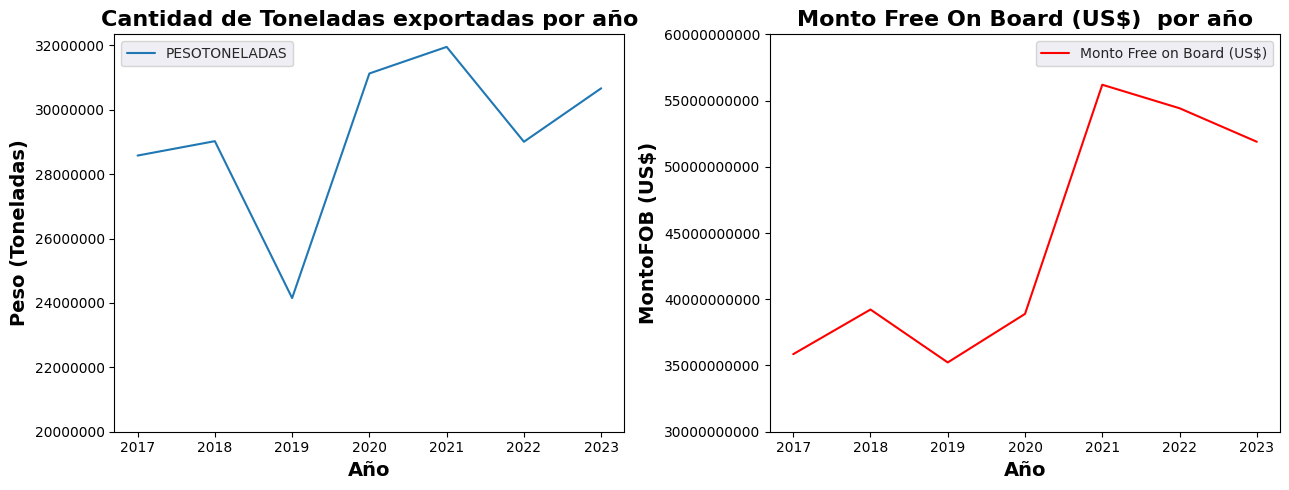

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (13,5))

# Gráfico del peso en Toneladas

sns.set_style('darkgrid')
sns.lineplot(data = resumen_anual, x = resumen_anual.index, y = 'PESOTONELADAS', label = 'PESOTONELADAS', ax = ax[0] )
ax[0].set_title('Cantidad de Toneladas exportadas por año', fontsize = 16, fontweight = 'bold' )        #Esto solo incluye los mineras de cobre, oro, plata, hierro y litio.
ax[0].set_xlabel('Año', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Peso (Toneladas)', fontsize = 14, fontweight = 'bold')
ax[0].set_yticks([20000000, 22000000, 24000000, 26000000, 28000000, 30000000, 32000000], ['20000000', '22000000', '24000000', '26000000', '28000000', '30000000', '32000000'] )

#Gráfico del Monto Free On Board

sns.lineplot(data = resumen_anual, x = resumen_anual.index, y = 'MONTOFOB (US$)', label = 'Monto Free on Board (US$)', color = 'red', ax = ax[1])
ax[1].set_title('Monto Free On Board (US$)  por año', fontsize = 16, fontweight = 'bold' )        #Esto solo incluye los mineras de cobre, oro, plata, hierro y litio.
ax[1].set_xlabel('Año', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('MontoFOB (US$)', fontsize = 14, fontweight = 'bold')
ax[1].set_yticks([30000000000, 35000000000, 40000000000, 45000000000, 50000000000, 55000000000, 60000000000], ['30000000000', '35000000000', '40000000000', '45000000000', '50000000000', '55000000000', '60000000000'])

plt.tight_layout()
plt.show()


##**Resumen por producto**

In [20]:
resumen_productos = exportaciones_mineras.groupby(['AÑO','PRODUCTO'])[['MONTOFOB (US$)','PESOTONELADAS']].sum().reset_index()

In [21]:
resumen_productos.head()

,AÑO,PRODUCTO,MONTOFOB (US$),PESOTONELADAS
0,2017,Cobre,32603469284.33,13617065.31
1,2017,Hierro,998545434.77,14854527.46
2,2017,Litio,837775254.91,93872.78
3,2017,Oro,1167424901.94,7387.19
4,2017,Plata,246925153.28,4451.89


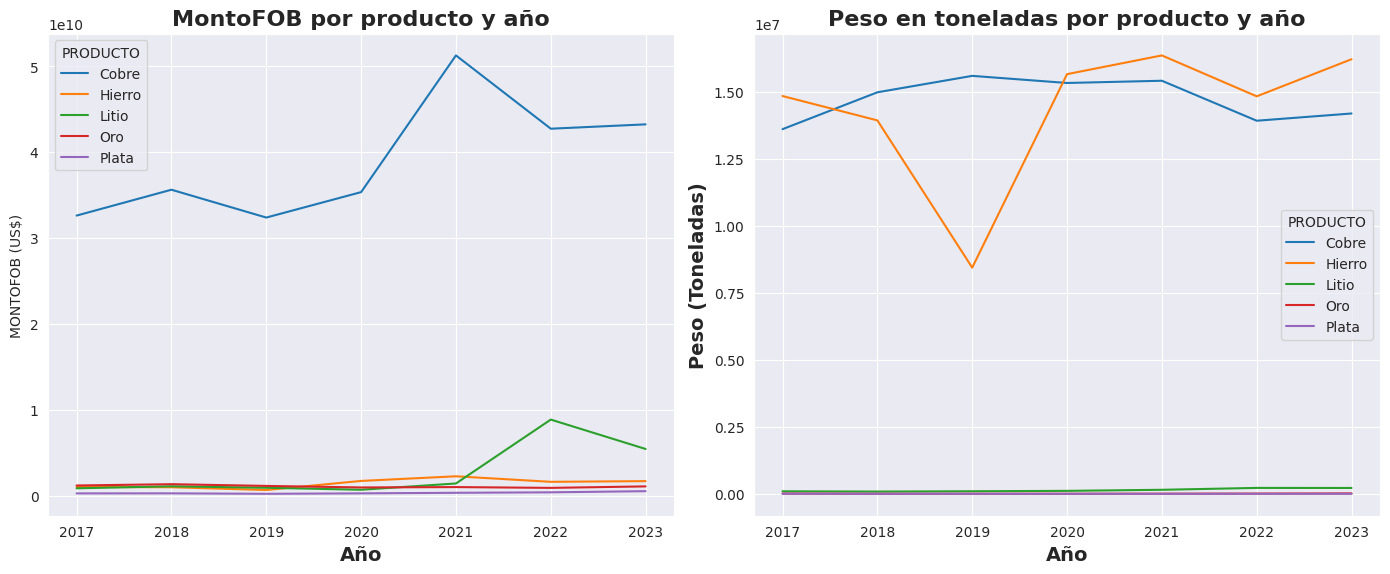

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.lineplot(data = resumen_productos, x = 'AÑO', y = 'MONTOFOB (US$)', hue = 'PRODUCTO', ax = ax[0])
ax[0].set_title('MontoFOB por producto y año', fontsize = 16, fontweight = 'bold')
ax[0].set_xlabel('Año', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('MONTOFOB (US$)')


sns.lineplot(data = resumen_productos, x = 'AÑO', y = 'PESOTONELADAS', hue = 'PRODUCTO', ax = ax[1])
ax[1].set_title('Peso en toneladas por producto y año', fontsize = 16, fontweight = 'bold')
ax[1].set_xlabel('Año', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('Peso (Toneladas)', fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show()

##**Resumen para el cobre**

In [23]:
filtro_cobre = exportaciones_mineras[exportaciones_mineras['PRODUCTO']== 'Cobre']
resumen_cobre = filtro_cobre.groupby('AÑO')[['MONTOFOB (US$)','PESOTONELADAS']].sum().reset_index()
cargas_cobre_anuales = filtro_cobre.value_counts('AÑO').reset_index()
cargas_cobre_mensuales = filtro_cobre.value_counts('MES').reset_index()
resumen_cobre.sample(5)

,AÑO,MONTOFOB (US$),PESOTONELADAS
6,2023,43227395144.04,14202654.22
4,2021,51257037225.66,15425416.23
3,2020,35334871477.49,15342096.91
1,2018,35615316692.19,14993990.54
5,2022,42721617660.67,13932390.09


In [24]:
cargas_cobre_anuales.columns = ['AÑO', 'Cargas anuales']
cargas_cobre_mensuales.columns = ['MES', 'Cargas mensuales']
cargas_cobre_anuales.head()

,AÑO,Cargas anuales
0,2023,2077
1,2022,2017
2,2019,1801
3,2018,1765
4,2021,1648


In [25]:
mapeo_meses = {'Enero':1, 'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12}
cargas_cobre_mensuales['MES'] = cargas_cobre_mensuales['MES'].map(mapeo_meses)
cargas_cobre_mensuales.head(12)

,MES,Cargas mensuales
0,4,1082
1,1,1074
2,3,1061
3,5,1059
4,7,1053
5,12,1052
6,11,1050
7,6,1039
8,8,1031
9,10,1020


##**Gráficos de resumen para el cobre**

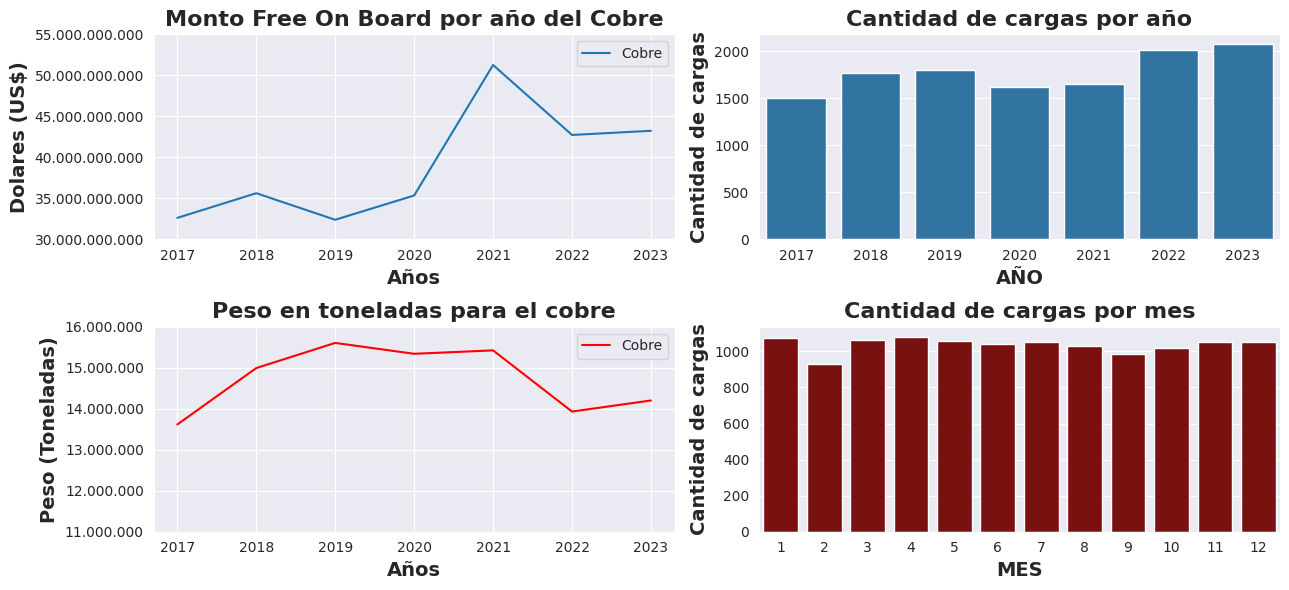

In [26]:
sns.set_style('darkgrid')

#Gráfico del monto free on board para el cobre

fig, ax = plt.subplots(2, 2, figsize = (13, 6))
sns.lineplot(data = resumen_cobre, x = 'AÑO', y = 'MONTOFOB (US$)', label = 'Cobre', ax = ax[0,0])
ax[0,0].set_title('Monto Free On Board por año del Cobre', fontsize = 16, fontweight = 'bold')
ax[0,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[0,0].set_ylabel('Dolares (US$)', fontsize = 14, fontweight = 'bold')
ax[0,0].set_yticks([30000000000, 35000000000, 40000000000, 45000000000, 50000000000, 55000000000], ['30.000.000.000', '35.000.000.000', '40.000.000.000', '45.000.000.000', '50.000.000.000', '55.000.000.000'])

#Gráfico del monto free on board para el cobre

sns.lineplot(data = resumen_cobre, x = 'AÑO', y = 'PESOTONELADAS', label = 'Cobre', color = 'red', ax = ax[1,0])
ax[1,0].set_title('Peso en toneladas para el cobre', fontsize = 16, fontweight = 'bold')
ax[1,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[1,0].set_ylabel('Peso (Toneladas)', fontsize = 14, fontweight = 'bold')
ax[1,0].set_yticks([11000000, 12000000, 13000000, 14000000, 15000000, 16000000], ['11.000.000', '12.000.000', '13.000.000', '14.000.000', '15.000.000', '16.000.000'])

#Gráfico del número de envíos realizados por año

sns.barplot(data = cargas_cobre_anuales, x = 'AÑO', y = 'Cargas anuales', ax = ax[0,1])
ax[0,1].set_xlabel('AÑO', fontsize = 14, fontweight = 'bold')
ax[0,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[0,1].set_title('Cantidad de cargas por año', fontsize = 16, fontweight = 'bold')

#Gráfico del número de envíos realizados por mes

sns.barplot(data = cargas_cobre_mensuales, x = 'MES', y = 'Cargas mensuales', ax = ax[1,1], color = 'darkred')
ax[1,1].set_xlabel('MES', fontsize = 14, fontweight = 'bold')
ax[1,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[1,1].set_title('Cantidad de cargas por mes', fontsize = 16, fontweight = 'bold')


plt.tight_layout()
plt.show()

##**Resumen para el litio**

In [27]:
filtro_litio = exportaciones_mineras[exportaciones_mineras['PRODUCTO']== 'Litio']
resumen_litio = filtro_litio.groupby('AÑO')[['MONTOFOB (US$)','PESOTONELADAS']].sum().reset_index()
cargas_litio_anuales = filtro_litio.value_counts('AÑO').reset_index()
cargas_litio_mensuales = filtro_litio.value_counts('MES').reset_index()
resumen_litio.head(8)

,AÑO,MONTOFOB (US$),PESOTONELADAS
0,2017,837775254.91,93872.78
1,2018,1074977171.65,83891.07
2,2019,900641092.08,95708.22
3,2020,670743842.42,110327.36
4,2021,1401383354.70,150156.52
5,2022,8843271708.15,220489.05
6,2023,5419161221.58,218382.34


In [28]:
cargas_litio_anuales.columns = ['AÑO', 'Cargas anuales']
cargas_litio_mensuales.columns = ['MES', 'Cargas mensuales']
cargas_litio_anuales.head()

,AÑO,Cargas anuales
0,2022,802
1,2023,727
2,2021,646
3,2020,483
4,2017,407


In [29]:
cargas_litio_mensuales['MES'] = cargas_litio_mensuales['MES'].map(mapeo_meses)
cargas_litio_mensuales.head(12)

,MES,Cargas mensuales
0,4,352
1,12,347
2,5,337
3,3,325
4,2,319
5,6,319
6,11,310
7,10,305
8,7,297
9,8,294


##**Gráficos Resumen para el litio**

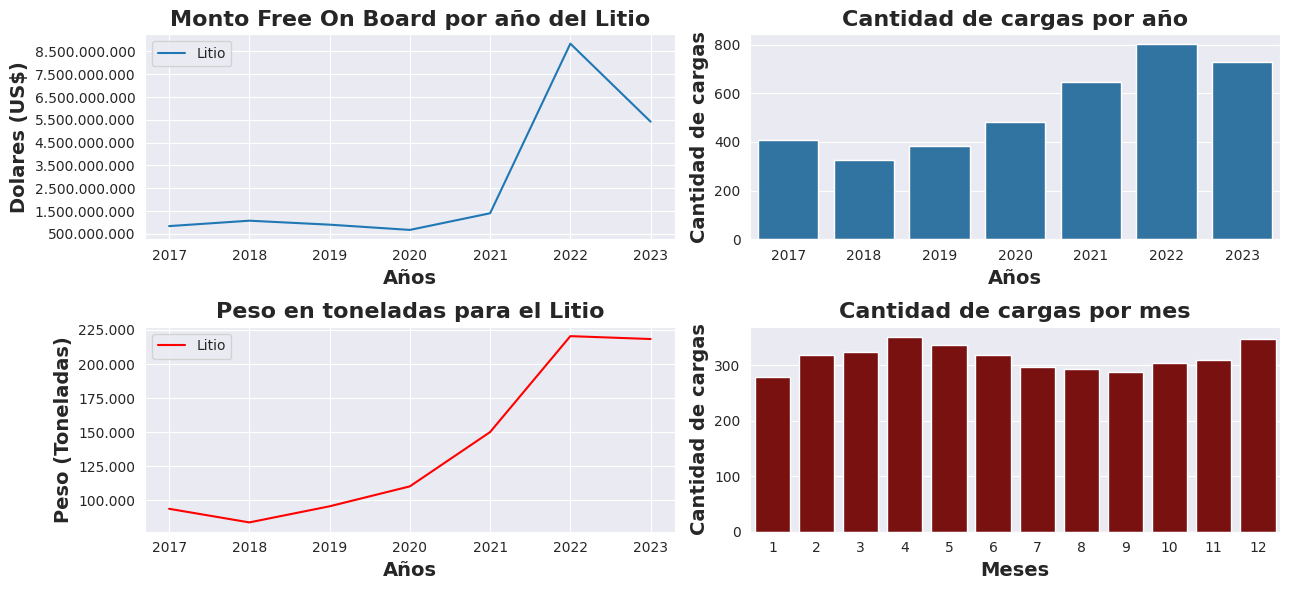

In [37]:
#Gráfico del monto free on board para el litio

fig, ax = plt.subplots(2, 2, figsize = (13, 6))
sns.lineplot(data = resumen_litio, x = 'AÑO', y = 'MONTOFOB (US$)', label = 'Litio', ax = ax[0,0])
ax[0,0].set_title('Monto Free On Board por año del Litio', fontsize = 16, fontweight = 'bold')
ax[0,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[0,0].set_ylabel('Dolares (US$)', fontsize = 14, fontweight = 'bold')
ax[0,0].set_yticks([500000000, 1500000000, 2500000000, 3500000000, 4500000000, 5500000000,6500000000,7500000000,8500000000], ['500.000.000', '1.500.000.000', '2.500.000.000', '3.500.000.000', '4.500.000.000', '5.500.000.000','6.500.000.000','7.500.000.000','8.500.000.000'])

#Gráfico del peso en toneladas para el litio

sns.lineplot(data = resumen_litio, x = 'AÑO', y = 'PESOTONELADAS', label = 'Litio', color = 'red', ax = ax[1,0])
ax[1,0].set_title('Peso en toneladas para el Litio', fontsize = 16, fontweight = 'bold')
ax[1,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[1,0].set_ylabel('Peso (Toneladas)', fontsize = 14, fontweight = 'bold')
ax[1,0].set_yticks([100000, 125000, 150000, 175000, 200000, 225000], ['100.000', '125.000', '150.000', '175.000', '200.000', '225.000'])

#Gráfico del número de envíos realizados por año

sns.barplot(data = cargas_litio_anuales, x = 'AÑO', y = 'Cargas anuales', ax = ax[0,1])
ax[0,1].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[0,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[0,1].set_title('Cantidad de cargas por año', fontsize = 16, fontweight = 'bold')

#Gráfico del número de envíos realizados por mes

sns.barplot(data = cargas_litio_mensuales, x = 'MES', y = 'Cargas mensuales', ax = ax[1,1], color = 'darkred')
ax[1,1].set_xlabel('Meses', fontsize = 14, fontweight = 'bold')
ax[1,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[1,1].set_title('Cantidad de cargas por mes', fontsize = 16, fontweight = 'bold')


plt.tight_layout()
plt.show()

##**Resumen para el Hierro**

In [31]:
filtro_hierro = exportaciones_mineras[exportaciones_mineras['PRODUCTO']== 'Hierro']
resumen_hierro = filtro_hierro.groupby('AÑO')[['MONTOFOB (US$)','PESOTONELADAS']].sum().reset_index()
cargas_hierro_anuales = filtro_hierro.value_counts('AÑO').reset_index()
cargas_hierro_mensuales = filtro_hierro.value_counts('MES').reset_index()
resumen_hierro.head(8)

,AÑO,MONTOFOB (US$),PESOTONELADAS
0,2017,998545434.77,14854527.46
1,2018,963876183.46,13944829.69
2,2019,640311818.29,8446366.85
3,2020,1698831948.98,15671694.95
4,2021,2238304101.09,16371170.91
5,2022,1594129841.77,14843400.12
6,2023,1676078912.53,16229244.13


In [32]:
cargas_hierro_anuales.columns = ['AÑO', 'Cargas anuales']
cargas_hierro_mensuales.columns = ['MES', 'Cargas mensuales']
cargas_hierro_anuales.head()

,AÑO,Cargas anuales
0,2023,82
1,2017,79
2,2018,78
3,2021,75
4,2020,72


In [33]:
cargas_hierro_mensuales['MES'] = cargas_hierro_mensuales['MES'].map(mapeo_meses)
cargas_hierro_mensuales.head(12)

,MES,Cargas mensuales
0,11,55
1,7,51
2,1,47
3,9,44
4,8,43
5,4,42
6,5,41
7,12,39
8,6,39
9,10,38


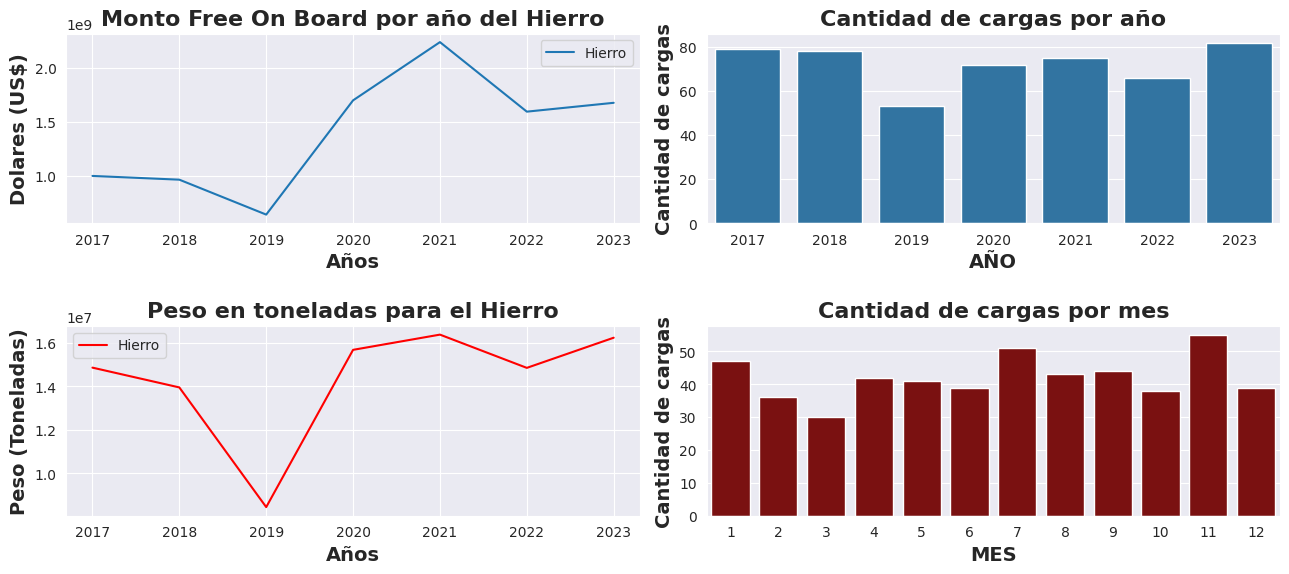

In [41]:
#Gráfico del monto free on board para el Hierro

fig, ax = plt.subplots(2, 2, figsize = (13, 6))
sns.lineplot(data = resumen_hierro, x = 'AÑO', y = 'MONTOFOB (US$)', label = 'Hierro', ax = ax[0,0])
ax[0,0].set_title('Monto Free On Board por año del Hierro', fontsize = 16, fontweight = 'bold')
ax[0,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[0,0].set_ylabel('Dolares (US$)', fontsize = 14, fontweight = 'bold')
# ax[0,0].set_yticks([30000000000, 35000000000, 40000000000, 45000000000, 50000000000, 55000000000], ['30.000.000.000', '35.000.000.000', '40.000.000.000', '45.000.000.000', '50.000.000.000', '55.000.000.000'])

#Gráfico del peso en toneladas para el hierro

sns.lineplot(data = resumen_hierro, x = 'AÑO', y = 'PESOTONELADAS', label = 'Hierro', color = 'red', ax = ax[1,0])
ax[1,0].set_title('Peso en toneladas para el Hierro', fontsize = 16, fontweight = 'bold')
ax[1,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[1,0].set_ylabel('Peso (Toneladas)', fontsize = 14, fontweight = 'bold')
# ax[1,0].set_yticks([100000, 125000, 150000, 175000, 200000, 225000], ['100.000', '125.000', '150.000', '175.000', '200.000', '225.000'])

#Gráfico del número de envíos realizados por año

sns.barplot(data = cargas_hierro_anuales, x = 'AÑO', y = 'Cargas anuales', ax = ax[0,1])
ax[0,1].set_xlabel('AÑO', fontsize = 14, fontweight = 'bold')
ax[0,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[0,1].set_title('Cantidad de cargas por año', fontsize = 16, fontweight = 'bold')

#Gráfico del número de envíos realizados por mes

sns.barplot(data = cargas_hierro_mensuales, x = 'MES', y = 'Cargas mensuales', ax = ax[1,1], color = 'darkred')
ax[1,1].set_xlabel('MES', fontsize = 14, fontweight = 'bold')
ax[1,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[1,1].set_title('Cantidad de cargas por mes', fontsize = 16, fontweight = 'bold')


plt.tight_layout()
plt.show()

##**Resumen Oro**

In [38]:
filtro_oro = exportaciones_mineras[exportaciones_mineras['PRODUCTO']== 'Oro']
resumen_oro = filtro_oro.groupby('AÑO')[['MONTOFOB (US$)','PESOTONELADAS']].sum().reset_index()
cargas_oro_anuales = filtro_oro.value_counts('AÑO').reset_index()
cargas_oro_mensuales = filtro_oro.value_counts('MES').reset_index()
resumen_oro.head(8)

,AÑO,MONTOFOB (US$),PESOTONELADAS
0,2017,1167424901.94,7387.19
1,2018,1318455289.66,1155.08
2,2019,1117290081.73,874.56
3,2020,939075715.14,2123.43
4,2021,981692933.75,4946.89
5,2022,889243735.98,8965.88
6,2023,1061662582.48,15802.81


In [39]:
cargas_oro_anuales.columns = ['AÑO', 'Cargas anuales']
cargas_oro_mensuales.columns = ['MES', 'Cargas mensuales']
cargas_oro_anuales.head()

,AÑO,Cargas anuales
0,2017,109
1,2018,105
2,2022,103
3,2023,103
4,2019,89


In [43]:
cargas_oro_mensuales['MES'] = cargas_oro_mensuales['MES'].map(mapeo_meses)
cargas_oro_mensuales.head(12)

,MES,Cargas mensuales
0,8,61
1,9,61
2,12,59
3,7,59
4,3,59
5,1,57
6,11,56
7,10,54
8,2,53
9,6,51


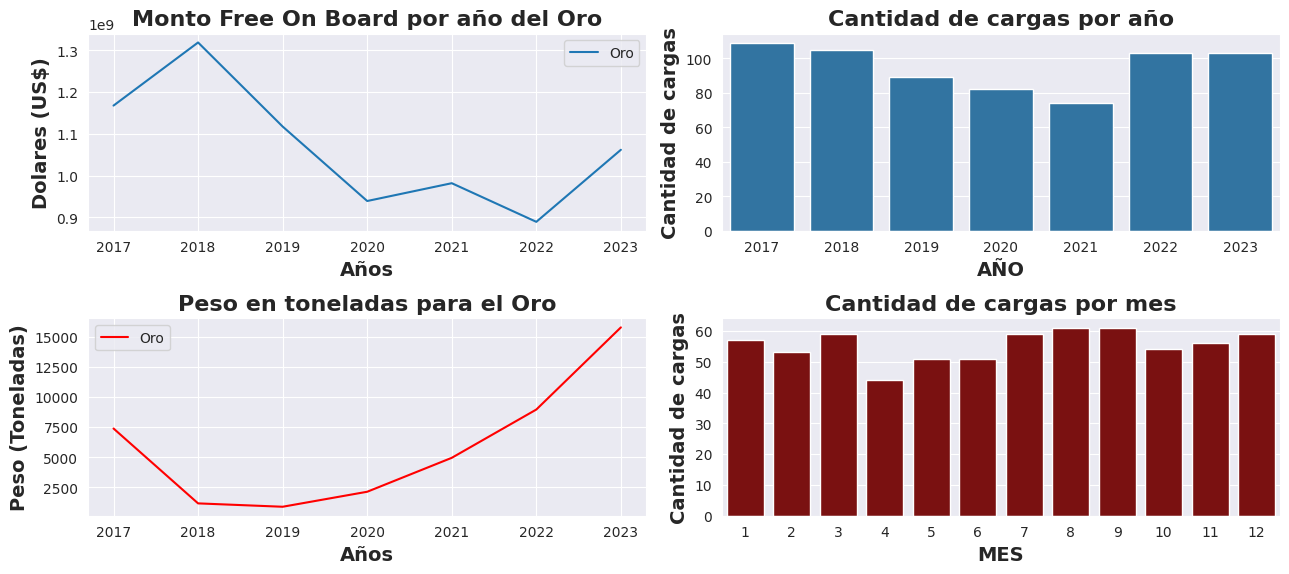

In [48]:
#Gráfico del monto free on board para el Oro

fig, ax = plt.subplots(2, 2, figsize = (13, 6))
sns.lineplot(data = resumen_oro, x = 'AÑO', y = 'MONTOFOB (US$)', label = 'Oro', ax = ax[0,0])
ax[0,0].set_title('Monto Free On Board por año del Oro', fontsize = 16, fontweight = 'bold')
ax[0,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[0,0].set_ylabel('Dolares (US$)', fontsize = 14, fontweight = 'bold')
# ax[0,0].set_yticks([30000000000, 35000000000, 40000000000, 45000000000, 50000000000, 55000000000], ['30.000.000.000', '35.000.000.000', '40.000.000.000', '45.000.000.000', '50.000.000.000', '55.000.000.000'])

#Gráfico del peso en toneladas para el oro

sns.lineplot(data = resumen_oro, x = 'AÑO', y = 'PESOTONELADAS', label = 'Oro', color = 'red', ax = ax[1,0])
ax[1,0].set_title('Peso en toneladas para el Oro', fontsize = 16, fontweight = 'bold')
ax[1,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[1,0].set_ylabel('Peso (Toneladas)', fontsize = 14, fontweight = 'bold')
# ax[1,0].set_yticks([100000, 125000, 150000, 175000, 200000, 225000], ['100.000', '125.000', '150.000', '175.000', '200.000', '225.000'])

#Gráfico del número de envíos realizados por año

sns.barplot(data = cargas_oro_anuales, x = 'AÑO', y = 'Cargas anuales', ax = ax[0,1])
ax[0,1].set_xlabel('AÑO', fontsize = 14, fontweight = 'bold')
ax[0,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[0,1].set_title('Cantidad de cargas por año', fontsize = 16, fontweight = 'bold')

#Gráfico del número de envíos realizados por mes

sns.barplot(data = cargas_oro_mensuales, x = 'MES', y = 'Cargas mensuales', ax = ax[1,1], color = 'darkred')
ax[1,1].set_xlabel('MES', fontsize = 14, fontweight = 'bold')
ax[1,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[1,1].set_title('Cantidad de cargas por mes', fontsize = 16, fontweight = 'bold')


plt.tight_layout()
plt.show()

##**Resumen Plata**

In [45]:
filtro_plata = exportaciones_mineras[exportaciones_mineras['PRODUCTO']== 'Plata']
resumen_plata = filtro_plata.groupby('AÑO')[['MONTOFOB (US$)','PESOTONELADAS']].sum().reset_index()
cargas_plata_anuales = filtro_plata.value_counts('AÑO').reset_index()
cargas_plata_mensuales = filtro_plata.value_counts('MES').reset_index()
resumen_plata.head(8)

,AÑO,MONTOFOB (US$),PESOTONELADAS
0,2017,246925153.28,4451.89
1,2018,251899775.86,454.79
2,2019,199099652.77,360.91
3,2020,250694540.96,411.68
4,2021,316747050.62,404.41
5,2022,372131507.11,466.07
6,2023,505207759.38,497.59


In [46]:
cargas_plata_anuales.columns = ['AÑO', 'Cargas anuales']
cargas_plata_mensuales.columns = ['MES', 'Cargas mensuales']
cargas_plata_anuales.head()

,AÑO,Cargas anuales
0,2017,105
1,2018,90
2,2019,89
3,2022,88
4,2021,73


In [47]:
cargas_plata_mensuales['MES'] = cargas_plata_mensuales['MES'].map(mapeo_meses)
cargas_plata_mensuales.head(12)

,MES,Cargas mensuales
0,1,56
1,5,52
2,10,52
3,8,51
4,3,50
5,9,49
6,4,47
7,12,47
8,2,47
9,6,44


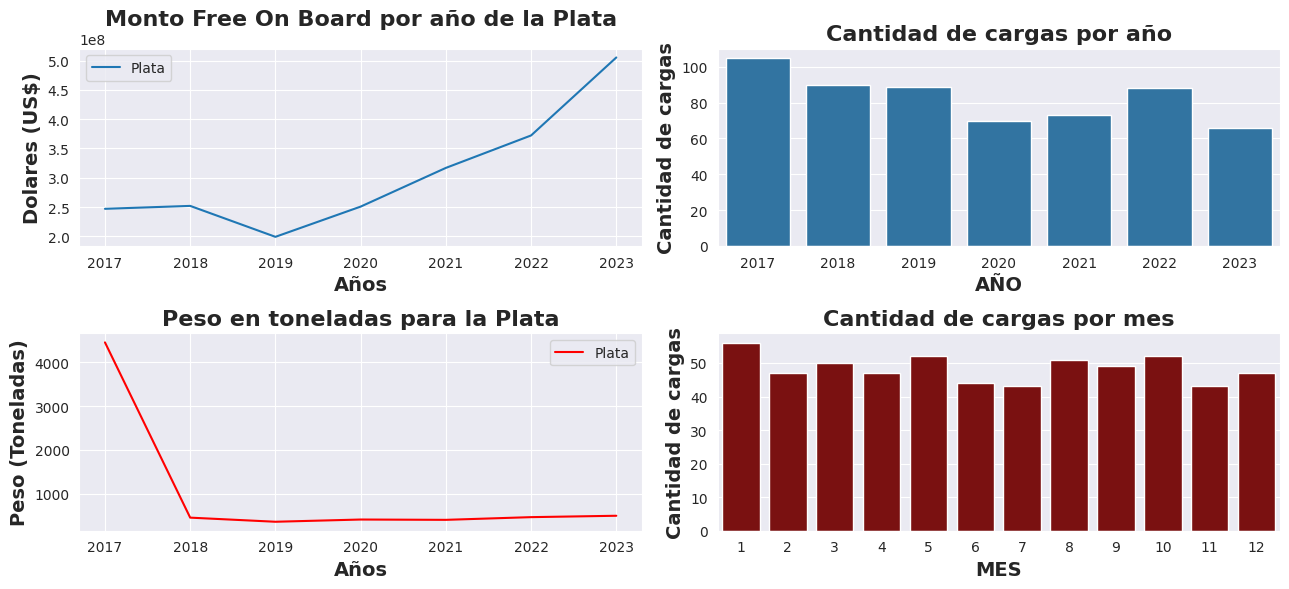

In [49]:
#Gráfico del monto free on board para la Plata

fig, ax = plt.subplots(2, 2, figsize = (13, 6))
sns.lineplot(data = resumen_plata, x = 'AÑO', y = 'MONTOFOB (US$)', label = 'Plata', ax = ax[0,0])
ax[0,0].set_title('Monto Free On Board por año de la Plata', fontsize = 16, fontweight = 'bold')
ax[0,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[0,0].set_ylabel('Dolares (US$)', fontsize = 14, fontweight = 'bold')
# ax[0,0].set_yticks([30000000000, 35000000000, 40000000000, 45000000000, 50000000000, 55000000000], ['30.000.000.000', '35.000.000.000', '40.000.000.000', '45.000.000.000', '50.000.000.000', '55.000.000.000'])

#Gráfico del peso en toneladas para la Plata

sns.lineplot(data = resumen_plata, x = 'AÑO', y = 'PESOTONELADAS', label = 'Plata', color = 'red', ax = ax[1,0])
ax[1,0].set_title('Peso en toneladas para la Plata', fontsize = 16, fontweight = 'bold')
ax[1,0].set_xlabel('Años', fontsize = 14, fontweight = 'bold')
ax[1,0].set_ylabel('Peso (Toneladas)', fontsize = 14, fontweight = 'bold')
# ax[1,0].set_yticks([100000, 125000, 150000, 175000, 200000, 225000], ['100.000', '125.000', '150.000', '175.000', '200.000', '225.000'])

#Gráfico del número de envíos realizados por año

sns.barplot(data = cargas_plata_anuales, x = 'AÑO', y = 'Cargas anuales', ax = ax[0,1])
ax[0,1].set_xlabel('AÑO', fontsize = 14, fontweight = 'bold')
ax[0,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[0,1].set_title('Cantidad de cargas por año', fontsize = 16, fontweight = 'bold')

#Gráfico del número de envíos realizados por mes

sns.barplot(data = cargas_plata_mensuales, x = 'MES', y = 'Cargas mensuales', ax = ax[1,1], color = 'darkred')
ax[1,1].set_xlabel('MES', fontsize = 14, fontweight = 'bold')
ax[1,1].set_ylabel('Cantidad de cargas', fontsize = 14, fontweight = 'bold')
ax[1,1].set_title('Cantidad de cargas por mes', fontsize = 16, fontweight = 'bold')


plt.tight_layout()
plt.show()

#**Conclusiones**
* El producto minero que más exporta Chile sigue siendo el Cobre en cuanto a peso en toneladas, también es el que más ingresos le genera.

* Durante el año 2021 se presentó un gran alza en las exportaciones en especial del cobre, esto se debe a los tratados de libre comercio: https://www.subrei.gob.cl/sala-de-prensa/noticias/detalle-noticias/2022/01/07/comercio-exterior-de-chile-crece-41-en-2021-impulsado-por-env%C3%ADos-no-cobre-y-servicios

* También se destaca el gran crecimiento que ha tenido el Litio los últimos años en las exportaciones chilenas tanto en cantidad como en dinero generado por exportaciones, esto se debe a la gran demanda que existe en el mundo por este mineral y siendo Chile el segundo exportador más grande de este mineral, el cual es muy usado para la fabricación de baterías.

* Otro aspecto destacable es que varios productos mineros durante el año 2019 tuvieron una gran caída en sus exportaciones. Esto se debe a los conflictos comerciales entre otros países: https://www.subrei.gob.cl/docs/default-source/estudios-y-documentos/reporte-trimestral/comercio-exterior-de-chile-anual-2019.pdf?sfvrsn=1eb0bb58_0

* El hierro es uno de los minerales que más se ha exportado durante los últimos años en Chile, solo por detrás del cobre, aunque no genera tantas ganancias. La causa de que se exporte cada vez más es debido a que Chile es uno de los cuatro países que más Hierro tienen y durante los últimos años, China tiene una gran demanda de este mineral para industrias como la automovilística y tecnológica: https://www.cnnchile.com/m360/versatilidad-resistencia-mineria-hierro-chile_20211127/#:~:text=el%20futuro%20minero-,La%20exportaci%C3%B3n%20de%20este%20metal%20aument%C3%B3%20durante%20los%20%C3%BAltimos%20dos,de%20la%20demanda%20mundial%20total.